In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from google.colab import drive
import zipfile
import os

# Path to the zip file you uploaded
zip_file_path = '/content/drive/MyDrive/horse-or-human (1).zip'

# Directory to extract the contents
extract_dir = '/content/extracted_files/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

Extraction complete.


In [10]:
train_horse_dir= os.path.join('/content/extracted_files/horses')
train_human_dir=os.path.join('/content/extracted_files/humans')

In [13]:
train_human_dir,train_horse_dir

('/content/extracted_files/humans', '/content/extracted_files/horses')

In [15]:
train_horse_names= os.listdir(train_horse_dir)
train_human_names= os.listdir(train_human_dir)
print(train_horse_names[:10])
print(train_human_names[:10])

['horse01-7.png', 'horse37-0.png', 'horse35-0.png', 'horse17-8.png', 'horse10-2.png', 'horse01-3.png', 'horse23-9.png', 'horse49-5.png', 'horse09-3.png', 'horse31-4.png']
['human04-10.png', 'human02-04.png', 'human15-01.png', 'human05-22.png', 'human04-04.png', 'human11-09.png', 'human05-07.png', 'human02-30.png', 'human03-30.png', 'human07-00.png']


In [16]:
print('total training horse images:',len(os.listdir(train_horse_dir)))
print('total training human images:',len(os.listdir(train_human_dir)))


total training horse images: 500
total training human images: 527


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


nrows = 4
ncols = 4

pic_index = 0

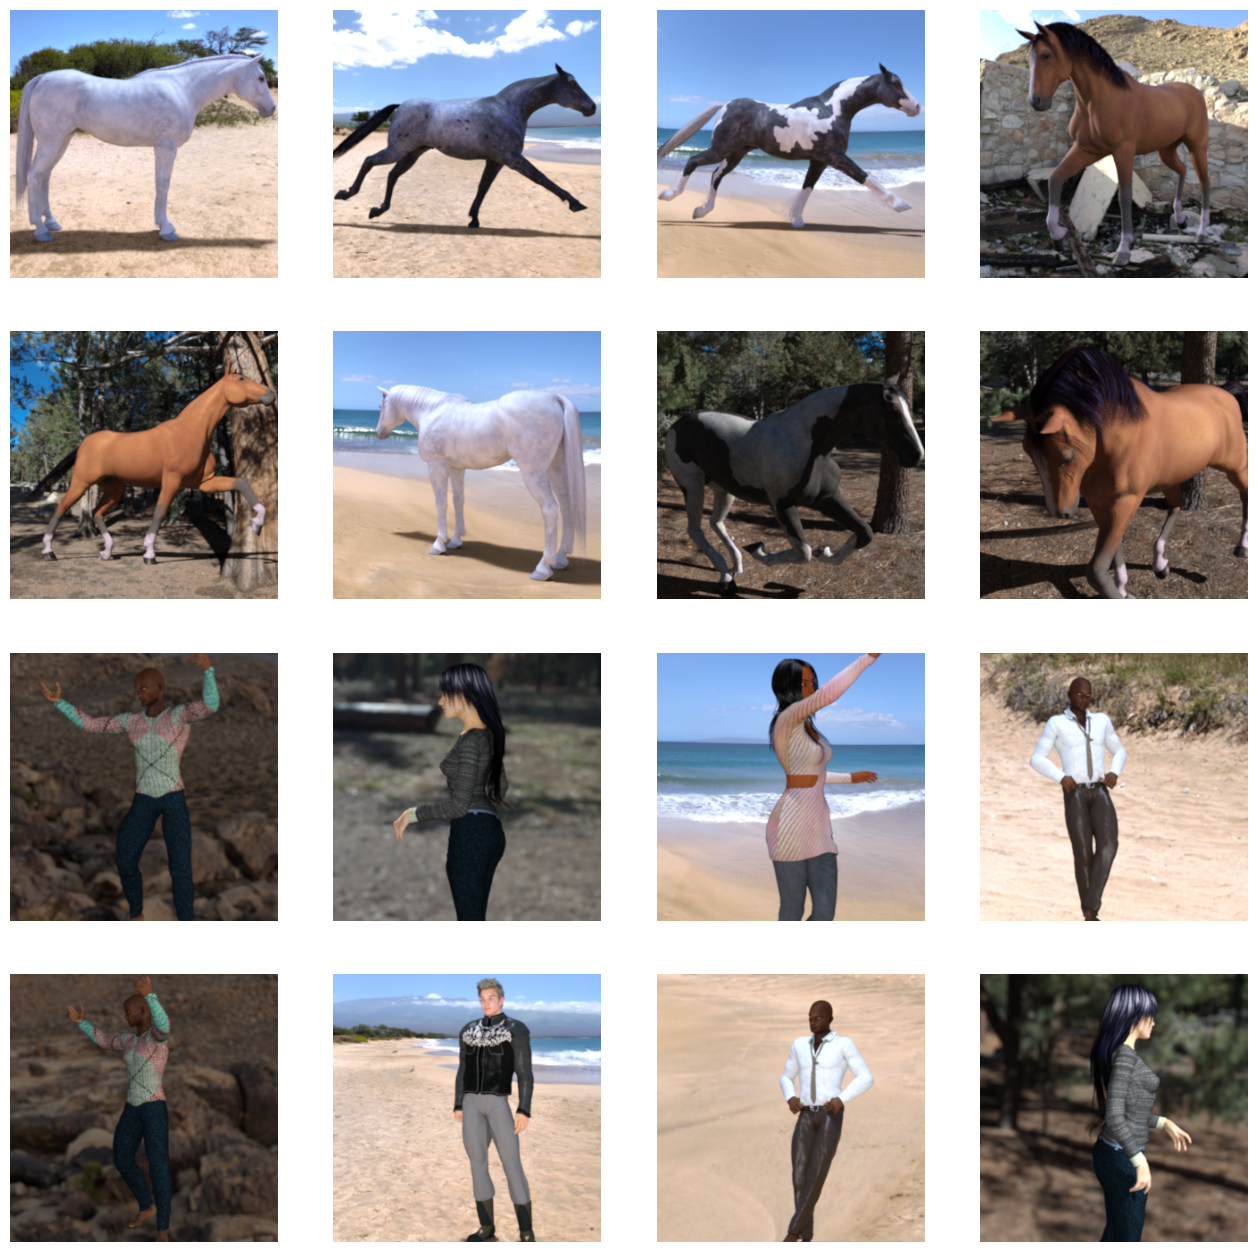

In [20]:
fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows *4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [21]:
import tensorflow as tf

In [22]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen= ImageDataGenerator(rescale=1/255)

train_generator= train_datagen.flow_from_directory(
    '/content/extracted_files/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)



Found 1027 images belonging to 2 classes.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, min_lr=1e-6)
]
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/15
8/8 [==============================] - 8s 935ms/step - loss: 0.0690 - accuracy: 0.9755 - lr: 0.0010
Epoch 2/15
8/8 [==============================] - 7s 871ms/step - loss: 0.0171 - accuracy: 0.9978 - lr: 0.0010
Epoch 3/15
8/8 [==============================] - 7s 829ms/step - loss: 0.0053 - accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
8/8 [==============================] - 8s 902ms/step - loss: 0.0034 - accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
8/8 [==============================] - 8s 943ms/step - loss: 0.0018 - accuracy: 1.0000 - lr: 0.0010
Epoch 6/15
8/8 [==============================] - 7s 854ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 0.0010
Epoch 7/15
8/8 [==============================] - 8s 877ms/step - loss: 7.0025e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 8/15
8/8 [==============================] - 8s 946ms/step - loss: 0.2170 - accuracy: 0.9488 - lr: 0.0010
Epoch 9/15
8/8 [==============================] - 7s 846ms/step - loss: 0.0289 - accuracy: 0.9889 - lr: 0.00

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()


for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving girl2.jpg to girl2.jpg
1/1 [==============================] - 0s 19ms/step
[1.]
girl2.jpg is a human
